# Recurrent Neural Networks.... RNNs

# Embeddings are a bag of words model ... where the similar meaning words are clustered together...... which does not depend on the order in which they appear....
# Peppa pig Love Daddy.
# Daddy love Peppa pig.

# Word Order Dictate the Meaning..."Blue Sky"
# and SKY BLUE


# Q. How to learn the words as they appear in sequences ... ... . . ... .. . .Sequence Processing

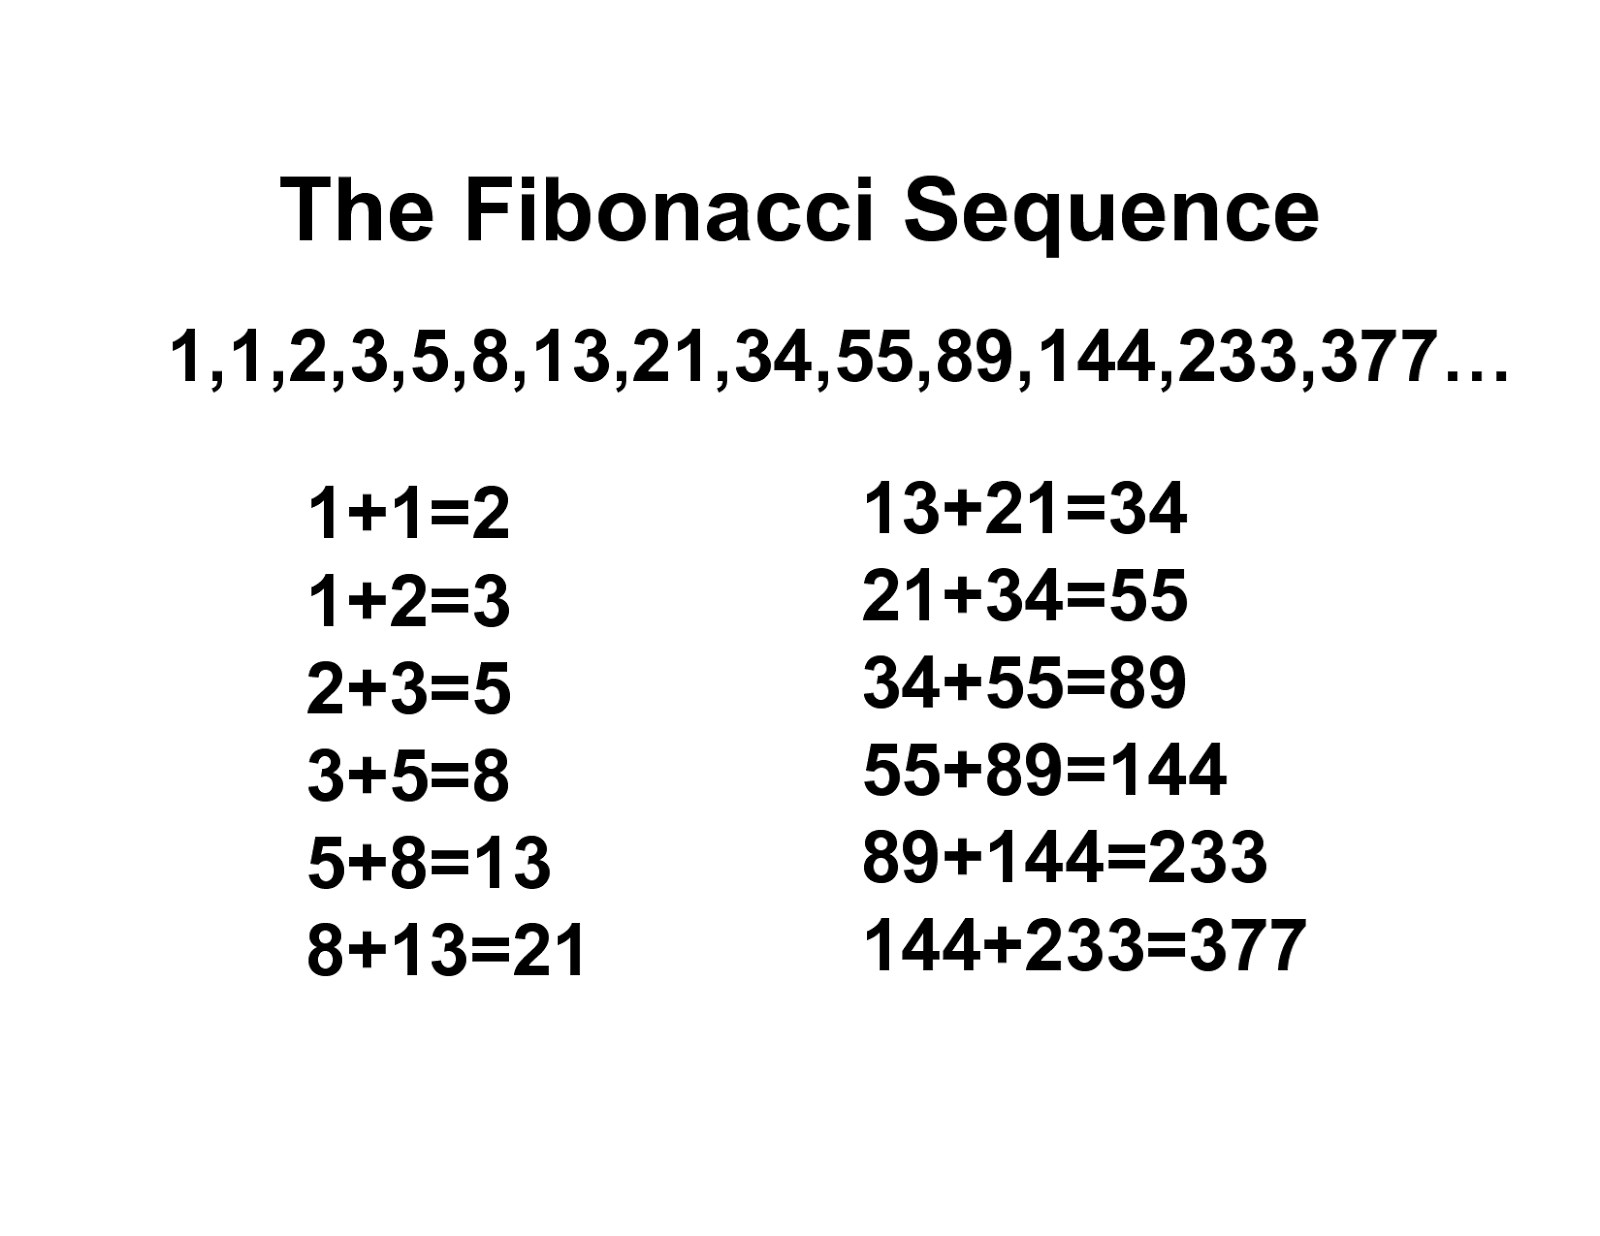

# To get '5'(current_output) 
#             = 3"present_input" + 2"past_output" 

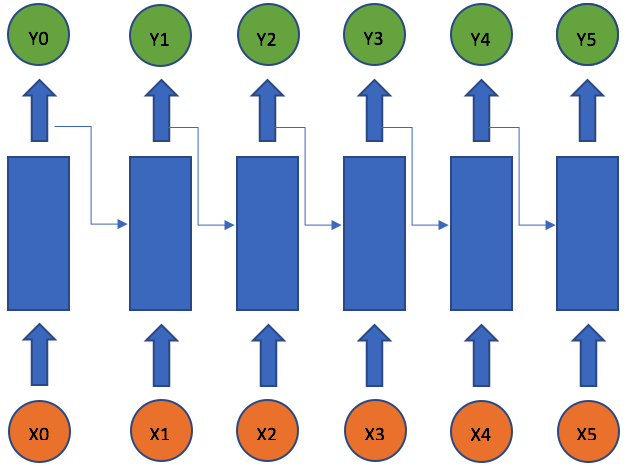

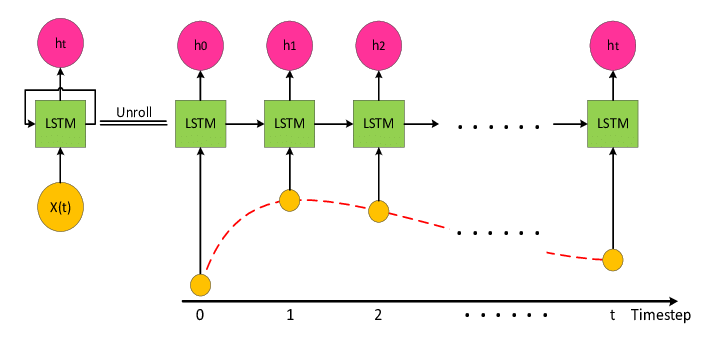

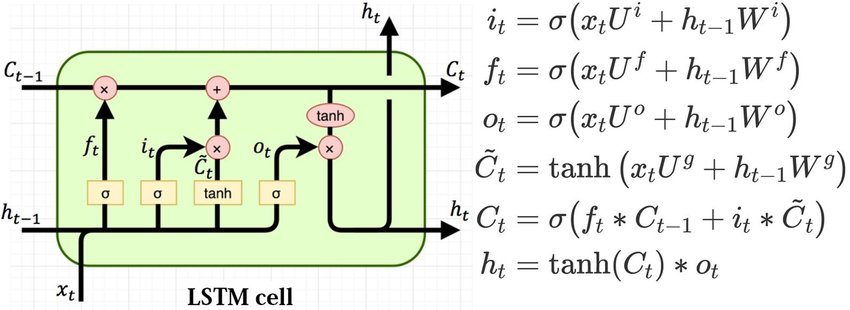

# https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/

In [ ]:
import numpy as np
import pandas as pd
#import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
data3 = """ Tab Rasode me kaun tha\n
		Tum thi ? mai thi?kaun tha?\n
		Rashi Thi\n
		Tab Rashi ne Kuckar me se chanee nikal diyaa
		aur kahlee kucker gas pe chadd diyaa\n """
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
data1 = ['How are you today',
         'What are you doing today',
         'How is your day today',
         'What are your plans today']
data2 = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']
data
token = Tokenizer()
token.fit_on_texts([data])
encoded = token.texts_to_sequences([data])[0]
#tokenizer.fit_on_texts(data2)
#encode1 = token.texts_to_matrix(data1, mode='count')
#print(token.word_counts)
#token.document_count
#token.word_index
#token.word_docs
#print(encode1)
vocab_size = len(token.word_index) + 1
#print('Vocabulary Size: %d' % vocab_size)
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
#print('Total Sequences: %d' % len(sequences))
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
#X
#y
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=1)
Text Prediction
n_words = 15
text_test = 'Jack'
result = 'Jack'
for _ in range(n_words):
    encoded = token.texts_to_sequences([text_test])[0]
    encoded = np.array(encoded)
    # predict a word in the vocabulary
    y_Predict = model.predict_classes(encoded, verbose=0)
    Next_word = ''
    for word, index in token.word_index.items():
        if index == y_Predict:
            Next_word = word
            break
    text_test, result = Next_word, result + ' ' + Next_word
print(result)